In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

versicolor_petal_length = [ 4.7,  4.5,  4.9,  4. ,  4.6,  4.5,  4.7,  3.3,  4.6,  3.9,  3.5,
        4.2,  4. ,  4.7,  3.6,  4.4,  4.5,  4.1,  4.5,  3.9,  4.8,  4. ,
        4.9,  4.7,  4.3,  4.4,  4.8,  5. ,  4.5,  3.5,  3.8,  3.7,  3.9,
        5.1,  4.5,  4.5,  4.7,  4.4,  4.1,  4. ,  4.4,  4.6,  4. ,  3.3,
        4.2,  4.2,  4.2,  4.3,  3. ,  4.1]
versicolor_petal_width = [ 1.4,  1.5,  1.5,  1.3,  1.5,  1.3,  1.6,  1. ,  1.3,  1.4,  1. ,
        1.5,  1. ,  1.4,  1.3,  1.4,  1.5,  1. ,  1.5,  1.1,  1.8,  1.3,
        1.5,  1.2,  1.3,  1.4,  1.4,  1.7,  1.5,  1. ,  1.1,  1. ,  1.2,
        1.6,  1.5,  1.6,  1.5,  1.3,  1.3,  1.3,  1.2,  1.4,  1.2,  1. ,
        1.3,  1.2,  1.3,  1.3,  1.1,  1.3]
df = pd.read_csv('../data/iris.csv')

## Mean

In [2]:
# Compute the mean: mean_length_vers
mean_length_vers = np.mean(versicolor_petal_length)

# Print the result with some nice formatting
print('I. versicolor:', mean_length_vers, 'cm')

I. versicolor: 4.26 cm


## Median
Immune to outliers  
50th percentile

In [3]:
# Compute the median: median_length_vers
median_length_vers = np.median(versicolor_petal_length)

# Print the result with some nice formatting
print('I. versicolor:', median_length_vers, 'cm')

I. versicolor: 4.35 cm


## Percentiles
ECDF y-axis value  
Box plot (box 25th - 75th percentile, box hight = IQR = middle 50%, extent of data - 1,5 IQR)  
Outliers - points bigger than 2 IQR  


In [4]:
# Specify array of percentiles: percentiles
percentiles = np.array([2.5, 25, 50, 75, 97.5])

# Compute percentiles: ptiles_vers
ptiles_vers = np.percentile(versicolor_petal_length, percentiles)

# Print the result
print(ptiles_vers)

[ 3.3     4.      4.35    4.6     4.9775]


#### ECDF

In [5]:
x_vers = [ 3. ,  3.3,  3.3,  3.5,  3.5,  3.6,  3.7,  3.8,  3.9,  3.9,  3.9,
        4. ,  4. ,  4. ,  4. ,  4. ,  4.1,  4.1,  4.1,  4.2,  4.2,  4.2,
        4.2,  4.3,  4.3,  4.4,  4.4,  4.4,  4.4,  4.5,  4.5,  4.5,  4.5,
        4.5,  4.5,  4.5,  4.6,  4.6,  4.6,  4.7,  4.7,  4.7,  4.7,  4.7,
        4.8,  4.8,  4.9,  4.9,  5. ,  5.1]
y_vers = [ 0.02,  0.04,  0.06,  0.08,  0.1 ,  0.12,  0.14,  0.16,  0.18,
        0.2 ,  0.22,  0.24,  0.26,  0.28,  0.3 ,  0.32,  0.34,  0.36,
        0.38,  0.4 ,  0.42,  0.44,  0.46,  0.48,  0.5 ,  0.52,  0.54,
        0.56,  0.58,  0.6 ,  0.62,  0.64,  0.66,  0.68,  0.7 ,  0.72,
        0.74,  0.76,  0.78,  0.8 ,  0.82,  0.84,  0.86,  0.88,  0.9 ,
        0.92,  0.94,  0.96,  0.98,  1.  ]

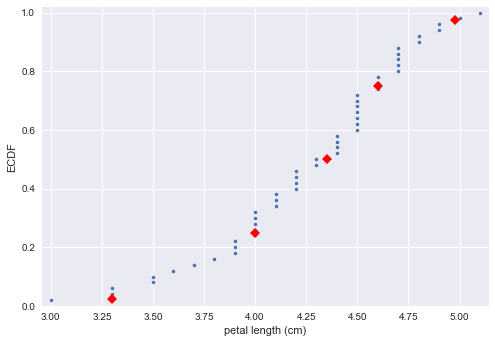

In [6]:
# Plot the ECDF
_ = plt.plot(x_vers, y_vers, '.')
plt.margins(0.02)
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Overlay percentiles as red diamonds.
_ = plt.plot(ptiles_vers, percentiles/100, marker='D', color='red',
         linestyle='none')

# Show the plot
plt.show()

#### Box plot

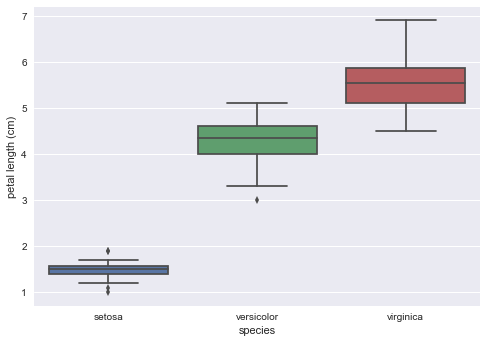

In [7]:
# Create box plot with Seaborn's default settings
_ = sns.boxplot(x='species', y='petal length (cm)', data=df)

# Label the axes
_ = plt.xlabel('species')
_ = plt.ylabel('petal length (cm)')


# Show the plot
plt.show()



## Variance

The mean squared distance of the data from their mean  
A measure of the spread of data 


In [8]:
# Array of differences to mean: differences
differences = versicolor_petal_length - np.mean(versicolor_petal_length)

# Square the differences: diff_sq
diff_sq = differences ** 2

# Compute the mean square difference: variance_explicit
variance_explicit = np.mean(diff_sq)

# Compute the variance using NumPy: variance_np
variance_np = np.var(versicolor_petal_length)

# Print the results
print(variance_np, variance_explicit)

0.2164 0.2164


## Standard deviation

In [9]:
# Compute the variance: variance
variance = np.var(versicolor_petal_length)

# Print the square root of the variance
print(np.sqrt(variance))

# Print the standard deviation
print(np.std(versicolor_petal_length))

0.465188133985
0.465188133985


## Covariance

Measure of how two quantities vary together  
Positively correlated/Negatively correlated

#### Covariance matrix
np.cov(x, y) returns a 2D array where entries [0,1] and [1,0] are the covariances.  
Entry [0,0] is the variance of the data in x, and entry [1,1] is the variance of the data in y.

## Pearson Correlation

1 = positively correlated  
-1 = negatively correlated  
0 = not correlated  

covariance / (std of x)(std of y)

variability due to codependence / independent variability  

In [10]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)

    # Return entry [0,1]
    return corr_mat[0, 1]

# Compute Pearson correlation coefficient for I. versicolor: r
r = pearson_r(versicolor_petal_length, versicolor_petal_width)

# Print the result
print(r)


0.786668088523
